In [1]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [3]:
date = datetime(2007,12,15,0) # date to plot.
# open dataset.
dataset = Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()

In [17]:
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
lats

array([[-89.875, -89.875, -89.875, ..., -89.875, -89.875, -89.875],
       [-89.625, -89.625, -89.625, ..., -89.625, -89.625, -89.625],
       [-89.375, -89.375, -89.375, ..., -89.375, -89.375, -89.375],
       ..., 
       [ 89.375,  89.375,  89.375, ...,  89.375,  89.375,  89.375],
       [ 89.625,  89.625,  89.625, ...,  89.625,  89.625,  89.625],
       [ 89.875,  89.875,  89.875, ...,  89.875,  89.875,  89.875]])

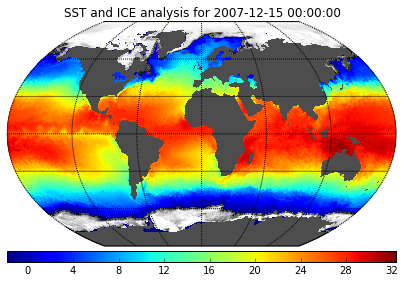

In [16]:
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='kav7',lon_0=0,resolution=None)
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
# plt.show()    #  would need this in a python script to flush figure